In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [79]:
# Read the data from loan.csv file
df_loan = pd.read_csv('loan.csv')

In [80]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           149999 non-null  int64  
 1   member_id                    149999 non-null  int64  
 2   loan_amnt                    149999 non-null  float64
 3   funded_amnt                  149999 non-null  float64
 4   funded_amnt_inv              149999 non-null  float64
 5   term                         149999 non-null  object 
 6   int_rate                     149999 non-null  float64
 7   installment                  149999 non-null  float64
 8   grade                        149999 non-null  object 
 9   sub_grade                    149999 non-null  object 
 10  emp_title                    140398 non-null  object 
 11  emp_length                   143916 non-null  object 
 12  home_ownership               149999 non-null  object 
 13 

In [81]:
# Review the size of the data
df_loan.shape

(149999, 74)

In [82]:
df_loan.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            149999
total_rev_hi_lim     42535
inq_fi              149999
total_cu_tl         149999
inq_last_12m        149999
Length: 74, dtype: int64

In [83]:
df_loan[df_loan.isnull().any(axis=1)]
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Review the dataframe
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# List the columns
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [86]:
# Identify the columns with null values
df_loan.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [87]:
# Reduce dataset to only necessary columns
columns = ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 
       'annual_inc', 'verification_status',
       'purpose', 'loan_status', 'total_pymnt', 'delinq_2yrs', 
       'inq_last_6mths', 'collections_12_mths_ex_med', 'revol_bal', 'total_acc']
df_data = df_loan[columns]
df_data.head()

#Removed ''earliest_cr_line' column as it is mixed with string and integer values, and could not be converted to integer

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,Fully Paid,5861.071414,0.0,1.0,0.0,13648.0,9.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,car,Charged Off,1008.710000,0.0,5.0,0.0,1687.0,4.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,Fully Paid,3003.653644,0.0,2.0,0.0,2956.0,10.0
3,1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,Fully Paid,12226.302212,0.0,1.0,0.0,5598.0,37.0
4,1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,other,Current,3242.170000,0.0,0.0,0.0,27783.0,38.0


In [88]:
# Check null values
df_data.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length                    6083
home_ownership                   0
annual_inc                       4
verification_status              0
purpose                          0
loan_status                      0
total_pymnt                      0
delinq_2yrs                     29
inq_last_6mths                  29
collections_12_mths_ex_med     145
revol_bal                        0
total_acc                       29
dtype: int64

In [89]:
# Convert null values to 0
df_data_clean = df_data.fillna(0)
df_data_clean.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc
0,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,Fully Paid,5861.071414,0.0,1.0,0.0,13648.0,9.0
1,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,car,Charged Off,1008.710000,0.0,5.0,0.0,1687.0,4.0
2,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,Fully Paid,3003.653644,0.0,2.0,0.0,2956.0,10.0
3,1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,Fully Paid,12226.302212,0.0,1.0,0.0,5598.0,37.0
4,1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,other,Current,3242.170000,0.0,0.0,0.0,27783.0,38.0


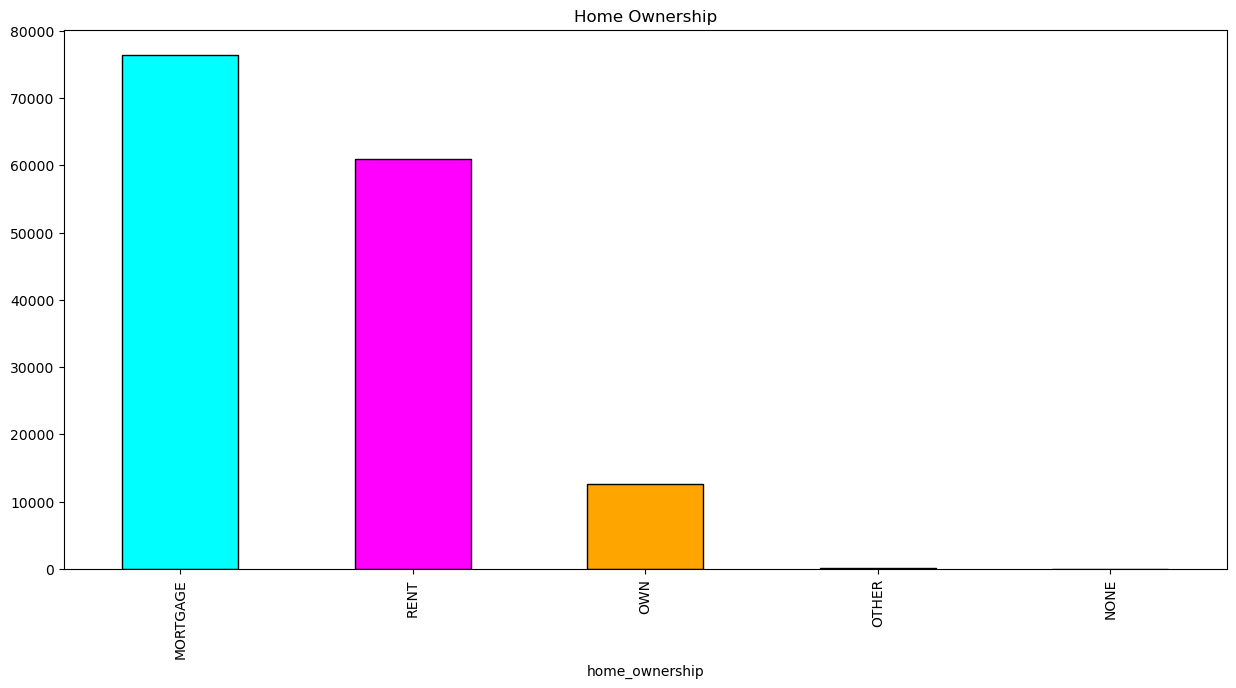

In [90]:
# Plot Count vs Home Ownership
colors = ['cyan', 'magenta', 'orange', 'purple', 'red']
df_data_clean['home_ownership'].value_counts().plot(kind='bar', 
        title='Home Ownership', color=colors, edgecolor='black', figsize=(15,7))

# Label 0 = Mortgage, 1 = Misc, 2 = Other, 3 = Own, 4 = Rent

plt.show()

In [91]:
# Transform string values to numerical values
def apply_label_encoding(column):
    labelencoder = LabelEncoder()
    return labelencoder.fit_transform(column)

columns_to_encode = ['term', 'grade', 'emp_length', 'home_ownership', 
                     'verification_status', 'purpose', 'loan_status']
df_data_clean[columns_to_encode] = df_data[columns_to_encode].apply(apply_label_encoding)
df_data_clean.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc
0,1077501,5000.0,5000.0,4975.0,0,10.65,162.87,1,1,4,24000.0,2,1,5,5861.071414,0.0,1.0,0.0,13648.0,9.0
1,1077430,2500.0,2500.0,2500.0,1,15.27,59.83,2,10,4,30000.0,1,0,0,1008.710000,0.0,5.0,0.0,1687.0,4.0
2,1077175,2400.0,2400.0,2400.0,0,15.96,84.33,2,1,4,12252.0,0,11,5,3003.653644,0.0,2.0,0.0,2956.0,10.0
3,1076863,10000.0,10000.0,10000.0,0,13.49,339.31,2,1,4,49200.0,1,9,5,12226.302212,0.0,1.0,0.0,5598.0,37.0
4,1075358,3000.0,3000.0,3000.0,1,12.69,67.79,1,0,4,80000.0,1,9,1,3242.170000,0.0,0.0,0.0,27783.0,38.0


In [92]:
# Define features set
X = df_data_clean.drop('grade', axis=1)
X.head(100)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc
0,1077501,5000.0,5000.0,4975.0,0,10.65,162.87,1,4,24000.0,2,1,5,5861.071414,0.0,1.0,0.0,13648.0,9.0
1,1077430,2500.0,2500.0,2500.0,1,15.27,59.83,10,4,30000.0,1,0,0,1008.710000,0.0,5.0,0.0,1687.0,4.0
2,1077175,2400.0,2400.0,2400.0,0,15.96,84.33,1,4,12252.0,0,11,5,3003.653644,0.0,2.0,0.0,2956.0,10.0
3,1076863,10000.0,10000.0,10000.0,0,13.49,339.31,1,4,49200.0,1,9,5,12226.302212,0.0,1.0,0.0,5598.0,37.0
4,1075358,3000.0,3000.0,3000.0,1,12.69,67.79,0,4,80000.0,1,9,1,3242.170000,0.0,0.0,0.0,27783.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1068575,15300.0,15300.0,15275.0,1,22.06,423.10,6,4,85000.0,2,1,1,20295.800000,0.0,2.0,0.0,26524.0,27.0
96,1049528,20000.0,12800.0,12775.0,1,11.71,282.86,4,0,47800.0,2,2,5,15161.270000,0.0,0.0,0.0,16447.0,27.0
97,1068542,17500.0,17500.0,17500.0,1,17.27,437.47,7,0,45000.0,0,1,0,10037.100000,0.0,2.0,0.0,20129.0,26.0
98,1068350,3500.0,3500.0,3500.0,0,6.03,106.53,1,0,83000.0,2,0,5,3834.660850,0.0,0.0,0.0,3092.0,28.0


In [93]:
# Define target vector (y)
y = df_data_clean['grade'].values

In [94]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [95]:
#Create a StandardScaler model and fit it into the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)


StandardScaler()

In [96]:
# Transform the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [112]:
# Use Linear Regression model
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression().fit(X_train_scaled, y_train)


In [113]:
# Make predictions using the testing data
LR_predictions = LR_model.predict(X_test_scaled)

# Print the r2 score for the model
print(f"Linear Regression R2 Score: {LR_model.score(X_test_scaled, y_test)}")

Linear Regression R2 Score: 0.9042630076931114


k: 1, Train/Test Score: 1.000/0.645
k: 3, Train/Test Score: 0.820/0.650
k: 5, Train/Test Score: 0.791/0.673
k: 7, Train/Test Score: 0.774/0.680
k: 9, Train/Test Score: 0.762/0.682
k: 11, Train/Test Score: 0.754/0.685
k: 13, Train/Test Score: 0.747/0.686
k: 15, Train/Test Score: 0.740/0.687
k: 17, Train/Test Score: 0.736/0.686
k: 19, Train/Test Score: 0.731/0.687


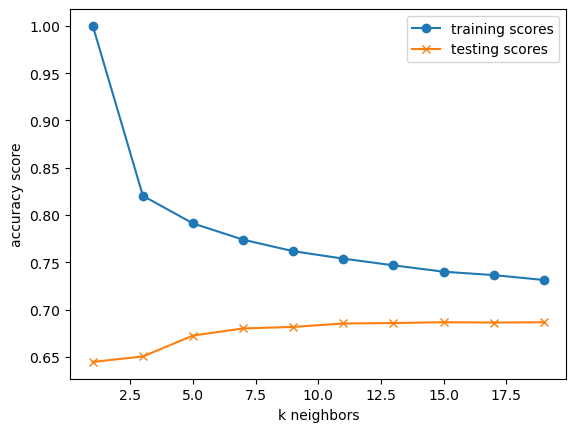

In [97]:
# Use K-Nearest Neighbor model to predict the grade of the loan
# Loop through different k values to find which has the highest accuracy.

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [98]:
# Train the model with k = 9 value
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Accuracy: 0.682


In [99]:
# Train the Random Forest model to compare with K-Nearest Neighbor model
rf = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score by RF: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score by RF: {rf.score(X_test_scaled, y_test)}')

Training Score by RF: 1.0
Testing Score by RF: 0.9807466666666667


In [110]:
# Make predictions using the testing data
predictions = rf.predict(X_test_scaled)

# Calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

# Display the accuracy score
print("Accuracy Score by RF: %.3f" % accuracy_score(y_test, predictions))

Accuracy Score by RF: 0.981


In [100]:
# Accuracy of Random Forest model is higher than K-Nearest Neighbor model

In [101]:
# Get feature importance array
feature_importances = rf.feature_importances_

In [102]:
# List top 10 most important features
importances_sorted = sorted(zip(rf.feature_importances_, X.columns), reverse=True)
importances_sorted[:20]

[(0.6953036579594235, 'int_rate'),
 (0.0687757164698165, 'id'),
 (0.04706539647806936, 'installment'),
 (0.022266738255745513, 'funded_amnt_inv'),
 (0.021520582709006312, 'term'),
 (0.019184448905003832, 'total_pymnt'),
 (0.017280792951764178, 'funded_amnt'),
 (0.017184066856127837, 'loan_amnt'),
 (0.01486245546649651, 'revol_bal'),
 (0.013495798601003646, 'annual_inc'),
 (0.012860439984277711, 'total_acc'),
 (0.011845469850006115, 'purpose'),
 (0.011728122457919697, 'inq_last_6mths'),
 (0.0075311557995572185, 'emp_length'),
 (0.007066007127701156, 'loan_status'),
 (0.004364539832669292, 'home_ownership'),
 (0.004191479996821969, 'verification_status'),
 (0.00326778315513298, 'delinq_2yrs'),
 (0.00020534714345678916, 'collections_12_mths_ex_med')]

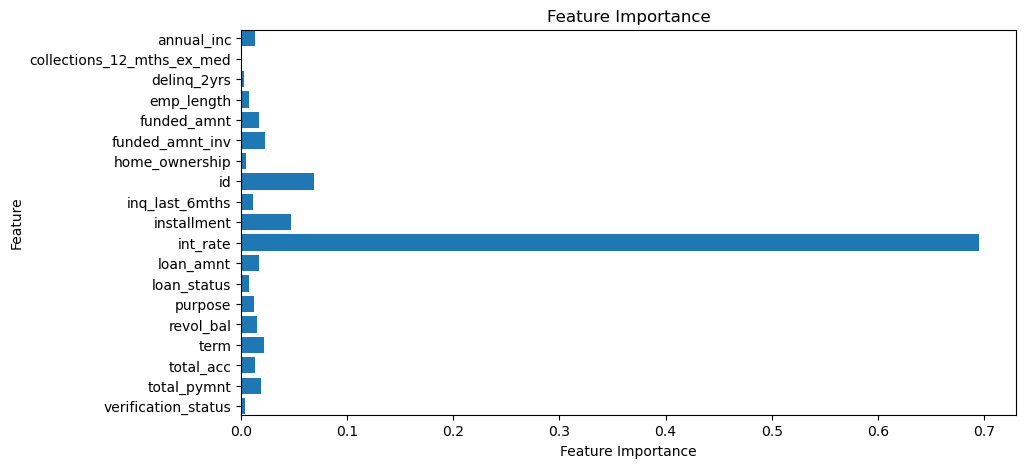

In [103]:
# Plot the feature importance
features = sorted(zip(rf.feature_importances_, X.columns), key = lambda x: x[1], reverse=True)
columns = [x[0] for x in features]
width = [x[1] for x in features]

fig, ax = plt.subplots()

fig.set_size_inches(10, 5)
plt.margins(y=0.001)
ax.barh(width, columns, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [106]:
# Fit training data to XGBoost model
from xgboost import XGBClassifier

XGBmodel = XGBClassifier()
XGBmodel.fit(X_train_scaled, y_train)

# Predict the results from Test set
y_predict_XGB = XGBmodel.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       1.00      1.00      1.00     11722
           2       1.00      1.00      1.00      9748
           3       0.99      0.99      0.99      5705
           4       0.98      0.99      0.98      2749
           5       0.96      0.95      0.95      1271
           6       0.85      0.93      0.89       329

    accuracy                           0.99     37500
   macro avg       0.97      0.98      0.97     37500
weighted avg       0.99      0.99      0.99     37500



In [122]:
# Add new columns to the dataframe - funded amount to annual_inc ratio
df_data_clean_R1 = df_data_clean.copy()
df_data_clean_R1['funded_amnt_to_annual_inc'] = (df_data_clean_R1['funded_amnt'] / df_data_clean_R1['annual_inc'])*100
df_data_clean_R1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc,installment_to_annual_inc,funded_amnt_to_annual_inc
0,1077501,5000.0,5000.0,4975.0,0,10.65,162.87,1,1,4,...,1,5,5861.071414,0.0,1.0,0.0,13648.0,9.0,0.678625,20.833333
1,1077430,2500.0,2500.0,2500.0,1,15.27,59.83,2,10,4,...,0,0,1008.710000,0.0,5.0,0.0,1687.0,4.0,0.199433,8.333333
2,1077175,2400.0,2400.0,2400.0,0,15.96,84.33,2,1,4,...,11,5,3003.653644,0.0,2.0,0.0,2956.0,10.0,0.688296,19.588639
3,1076863,10000.0,10000.0,10000.0,0,13.49,339.31,2,1,4,...,9,5,12226.302212,0.0,1.0,0.0,5598.0,37.0,0.689654,20.325203
4,1075358,3000.0,3000.0,3000.0,1,12.69,67.79,1,0,4,...,9,1,3242.170000,0.0,0.0,0.0,27783.0,38.0,0.084738,3.750000


<Axes: xlabel='funded_amnt_to_annual_inc', ylabel='grade'>

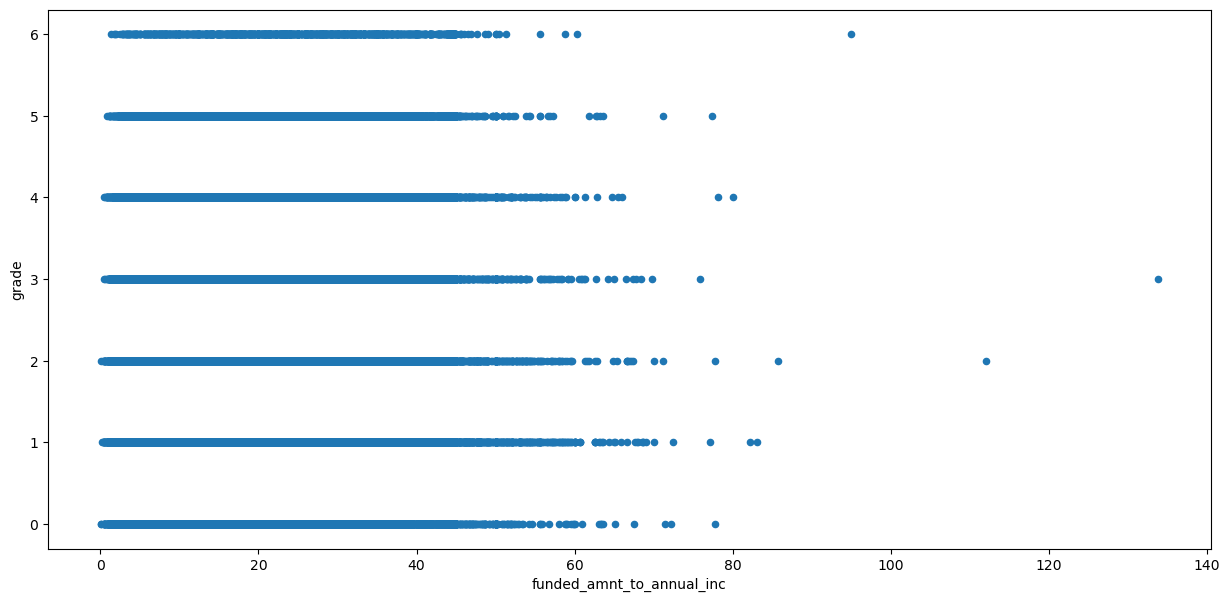

In [126]:
# Plot df_data_clean_R1['funded_amnt_to_annual_inc'] vs grade
df_data_clean_R1.plot.scatter(x='funded_amnt_to_annual_inc', y='grade', figsize=(15,7))


In [129]:
# Add new columns to the dataframe - revol_bal to annual_inc ratio
df_data_clean_R2 = df_data_clean.copy()
df_data_clean_R2['revol_bal_to_annual_inc'] = (df_data_clean['revol_bal'] / df_data_clean['annual_inc'])*100
df_data_clean_R2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,purpose,loan_status,total_pymnt,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,revol_bal,total_acc,installment_to_annual_inc,revol_bal_to_annual_inc
0,1077501,5000.0,5000.0,4975.0,0,10.65,162.87,1,1,4,...,1,5,5861.071414,0.0,1.0,0.0,13648.0,9.0,0.678625,56.866667
1,1077430,2500.0,2500.0,2500.0,1,15.27,59.83,2,10,4,...,0,0,1008.710000,0.0,5.0,0.0,1687.0,4.0,0.199433,5.623333
2,1077175,2400.0,2400.0,2400.0,0,15.96,84.33,2,1,4,...,11,5,3003.653644,0.0,2.0,0.0,2956.0,10.0,0.688296,24.126673
3,1076863,10000.0,10000.0,10000.0,0,13.49,339.31,2,1,4,...,9,5,12226.302212,0.0,1.0,0.0,5598.0,37.0,0.689654,11.378049
4,1075358,3000.0,3000.0,3000.0,1,12.69,67.79,1,0,4,...,9,1,3242.170000,0.0,0.0,0.0,27783.0,38.0,0.084738,34.728750


<Axes: xlabel='revol_bal_to_annual_inc', ylabel='grade'>

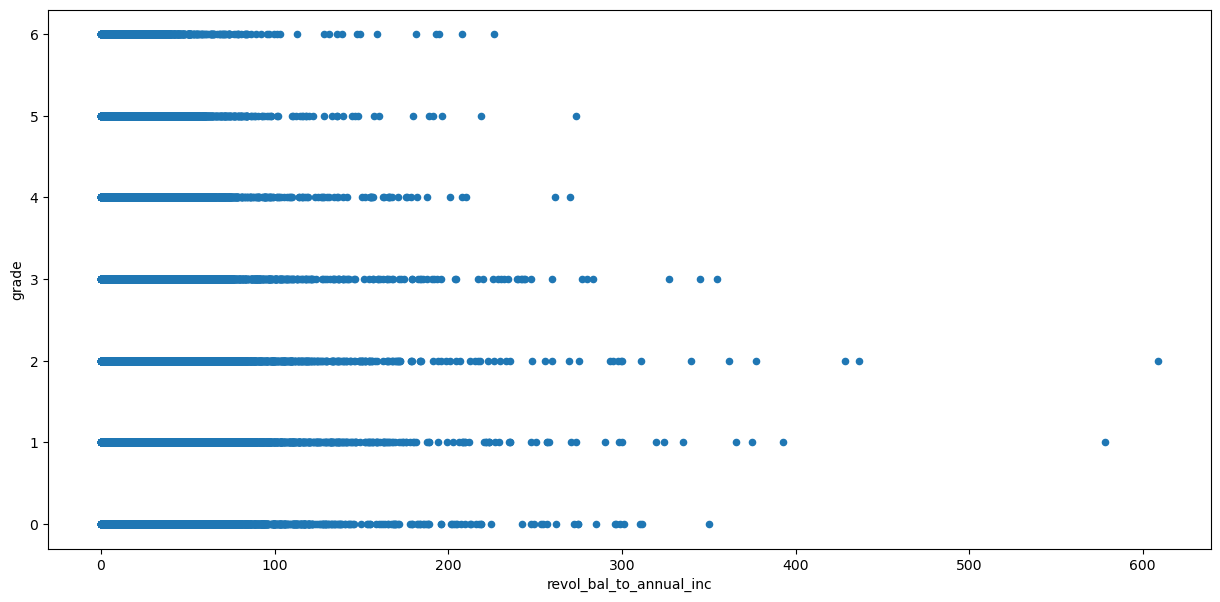

In [130]:
# Plot df_data_clean_R2['revol_bal_to_annual_inc'] vs grade
df_data_clean_R2.plot.scatter(x='revol_bal_to_annual_inc', y='grade', figsize=(15,7))

<Axes: xlabel='int_rate', ylabel='grade'>

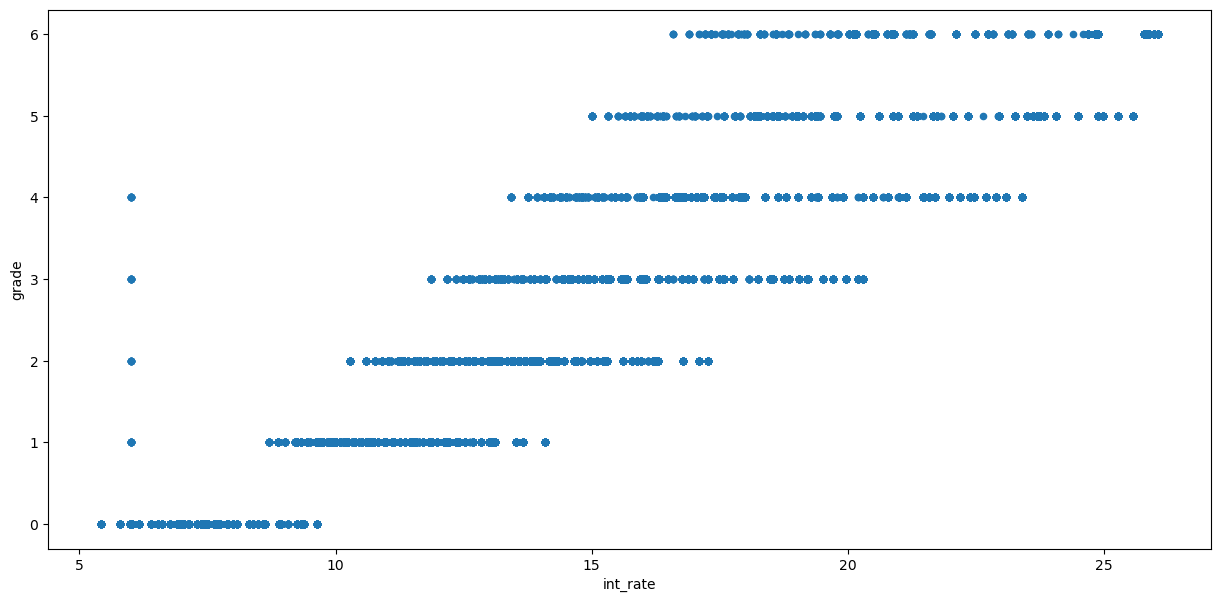

In [128]:
# Plot df_data_clean['int_rate'] vs grade
df_data_clean.plot.scatter(x='int_rate', y='grade', figsize=(15,7))

<Axes: xlabel='home_ownership', ylabel='grade'>

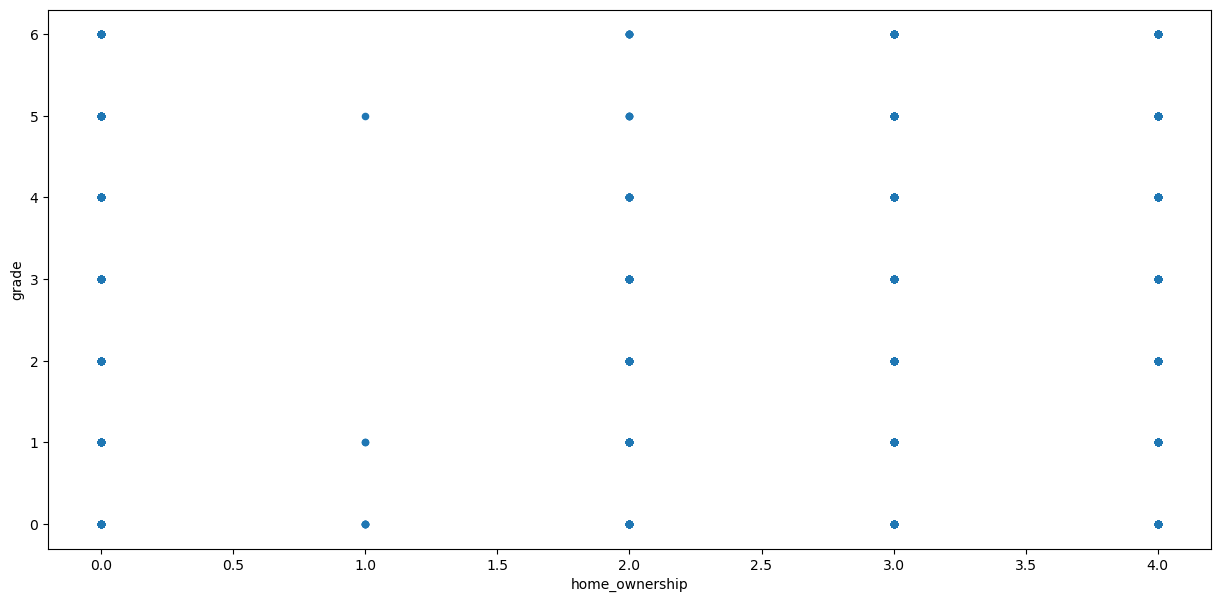

In [131]:
# Plot df_data_clean['home_ownership'] vs grade
df_data_clean.plot.scatter(x='home_ownership', y='grade', figsize=(15,7))

<Axes: xlabel='delinq_2yrs', ylabel='grade'>

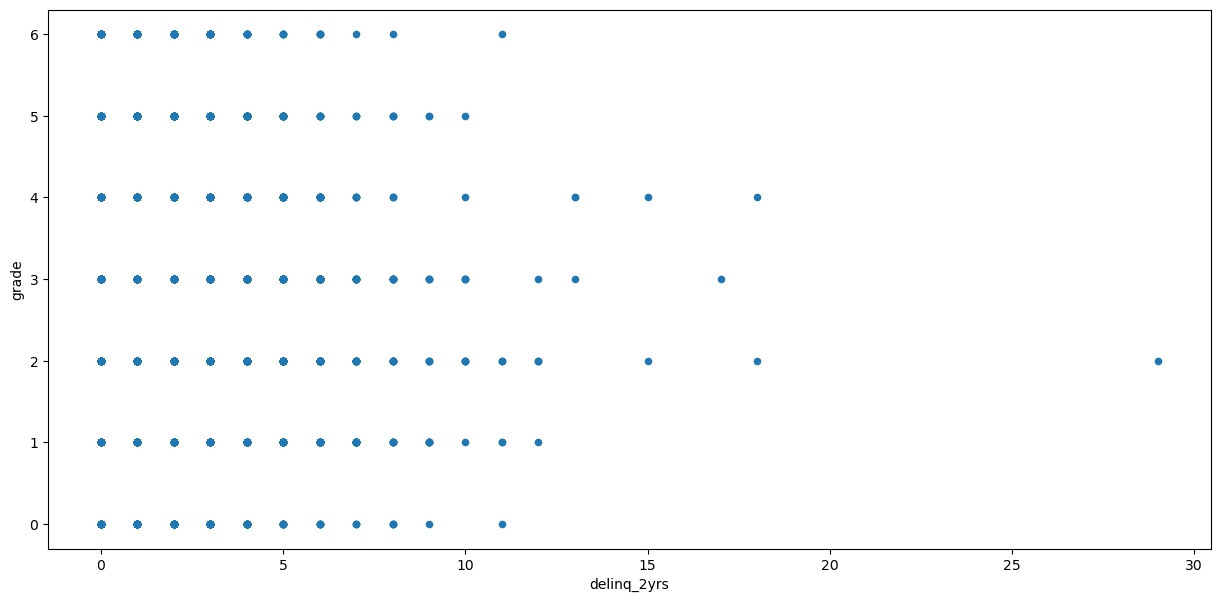

In [132]:
# Plot df_data_clean['delinq_2yrs'] vs grade
df_data_clean.plot.scatter(x='delinq_2yrs', y='grade', figsize=(15,7))

<Axes: xlabel='emp_length', ylabel='grade'>

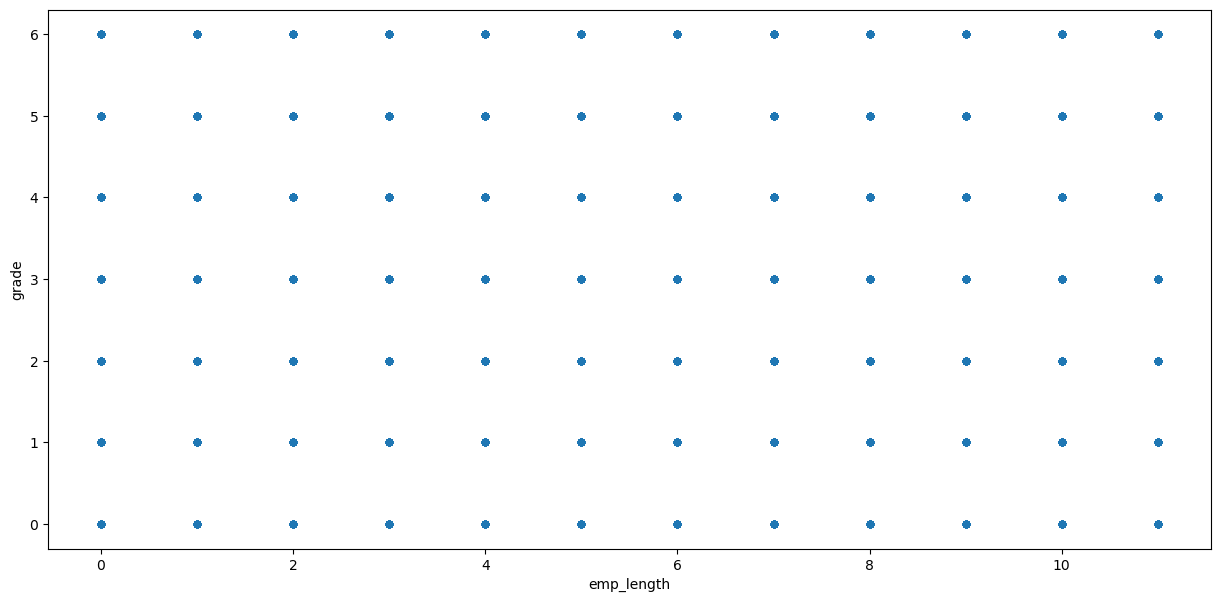

In [133]:
# Plot df_data_clean['emp_length'] vs grade
df_data_clean.plot.scatter(x='emp_length', y='grade', figsize=(15,7))